In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('mu_cn10000.csv')

In [6]:
X = df.drop(labels=['CN', 'Num Cu', 'Num Te'], axis=1)
y = df['CN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=519)

In [7]:
df.head()

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.920706,5.641016,4.279690,0.030303,0.032757,0.035112,0.037475,0.039958,0.042668,0.045714,...,0.994119,0.995957,0.998090,1.000540,1.003327,1.006472,1.009996,1.013918,1.018260,1.023043
1,9.038954,4.685766,4.353189,0.031529,0.034154,0.036671,0.039203,0.041875,0.044810,0.048132,...,0.999269,1.000942,1.002782,1.004773,1.006900,1.009148,1.011502,1.013947,1.016467,1.019047
2,9.725820,5.599930,4.125890,0.030576,0.033095,0.035505,0.037921,0.040456,0.043223,0.046335,...,0.994823,0.997591,1.000637,1.003974,1.007616,1.011577,1.015872,1.020514,1.025518,1.030897
3,9.374672,5.139779,4.234893,0.030891,0.033427,0.035861,0.038308,0.040883,0.043703,0.046883,...,0.999852,1.002114,1.004576,1.007246,1.010132,1.013241,1.016581,1.020158,1.023981,1.028057
4,9.599938,5.271755,4.328182,0.031077,0.033681,0.036170,0.038665,0.041287,0.044156,0.047393,...,0.998475,1.000035,1.001807,1.003776,1.005926,1.008242,1.010709,1.013311,1.016034,1.018861


In [8]:
ls

Decision tree.ipynb
Fitting with Larch lib.ipynb
GaussianProcessRegression_fitcurve.ipynb
Larch/
MLPRegressor_predict_CN.ipynb
MLPRegressor_predict_CN_Cu_Te.ipynb
Multi_Gaussin_try.ipynb
RF_10000data_derivate.ipynb
RF_predict_atom_number.ipynb
Untitled Folder/
Untitled.ipynb
Untitled1.ipynb
XANES_ML_Data.xlsx
__ init __.py
central_copper_list.csv
first_second_derivate_CN_10000average_spectra.csv
model_training.ipynb
mu10000.csv
mu_cn100.csv
mu_cn10000.csv
multiple_peak_deconvolution.ipynb
predict_CN_10000sample.ipynb
predict_descriptors.ipynb
sample_spectrum.csv
sys100.csv
weights100.csv


In [9]:
cd ..

/Users/hsiaoyuhsien/Desktop/XANES_Capstone


In [10]:
ls

Minimize_data_point/ docs/                mu10000.csv
PredictXANES/        environment.yml      sys10000.csv
README.md            examples/            weights10000.csv
__ init __.py        images/


In [11]:
cd Minimize_data_point/

/Users/hsiaoyuhsien/Desktop/XANES_Capstone/Minimize_data_point


In [12]:
ls

FEFF9_XANES.xlsx
Minimize_data_point.ipynb
fewest_datapoints_linearregression.ipynb


In [18]:
df = pd.read_excel('FEFF9_XANES.xlsx')

In [253]:
Data_1  = pd.read_excel('FEFF9_XANES.xlsx', 'Cu1.5Te')
Data_2  = pd.read_excel('FEFF9_XANES.xlsx', 'Cu2Te')
Data_3  = pd.read_excel('FEFF9_XANES.xlsx', 'CuTe')

mult = 5

In [254]:
coeff_a = 0.32
coeff_b = 0.27
coeff_c = 0.41
coeffs_known = [0.0]*3
coeffs_known[0] = coeff_a
coeffs_known[1] = coeff_b
coeffs_known[2] = coeff_c

In [256]:
from scipy.interpolate import UnivariateSpline

In [259]:
xs = np.linspace(8970, 9050, 1000)

In [260]:
s1 = UnivariateSpline(Data_1.omega[:], Data_1.mu[:], s=0)
y1 = s1(xs)
s2 = UnivariateSpline(Data_2.omega[:], Data_2.mu[:], s=0)
y2 = s2(xs)
s3 = UnivariateSpline(Data_3.omega[:], Data_3.mu[:], s=0)
y3 = s3(xs)


In [261]:
XX = [[0.0 for a in range(3)] for b in range(1000)]
YY = [0.0]*1000

In [269]:
for i in range(0,1000):
    XX[i][0] = y1[i]
    XX[i][1] = y2[i]
    XX[i][2] = y3[i]

    YY[i] = y1[i]*coeff_a + y2[i]*coeff_b + y3[i]*coeff_c + 0.10

In [262]:
n = 1000
m = 3

In [279]:
df_YY = pd.DataFrame(YY).transpose()


In [355]:
df_YY.max()

0      0.000000
1      0.000266
2      0.000529
3      0.000790
4      0.001049
         ...   
995    0.993634
996    0.993731
997    0.993821
998    0.993904
999    0.993980
Length: 1000, dtype: float64

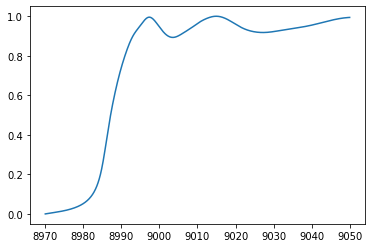

In [313]:
plt.plot(xs,YY)

In [315]:
YY

array([[0.00000000e+00],
       [2.65835816e-04],
       [5.29252884e-04],
       [7.90365652e-04],
       [1.04928857e-03],
       [1.30613609e-03],
       [1.56102266e-03],
       [1.81406273e-03],
       [2.06537075e-03],
       [2.31506118e-03],
       [2.56324845e-03],
       [2.81004703e-03],
       [3.05557135e-03],
       [3.29993588e-03],
       [3.54325506e-03],
       [3.78564334e-03],
       [4.02721517e-03],
       [4.26808500e-03],
       [4.50836728e-03],
       [4.74817647e-03],
       [4.98762700e-03],
       [5.22683334e-03],
       [5.46590993e-03],
       [5.70497121e-03],
       [5.94413166e-03],
       [6.18350570e-03],
       [6.42320779e-03],
       [6.66335238e-03],
       [6.90405393e-03],
       [7.14542688e-03],
       [7.38758568e-03],
       [7.63064478e-03],
       [7.87471863e-03],
       [8.11992168e-03],
       [8.36636838e-03],
       [8.61417319e-03],
       [8.86345055e-03],
       [9.11431491e-03],
       [9.36688072e-03],
       [9.62126243e-03],


In [286]:
XX = xs

In [287]:
YY = min_max_scaler.fit_transform(np.array(df_YY).reshape(-1, 1))

In [352]:
YY.max()

1.0

In [288]:
YY.std()

0.35600677439223855

In [334]:
def add_noise_to_spectrum(X, y, noise_std_der_percent = 0.05):
    pure = y
    y_std = y.std()
    noise = np.random.normal(0, noise_std_der_percent*y_std, pure.shape)
    signal = pure + noise
    plt.plot(X, signal)
    noised_Y = signal
    return noised_Y
    

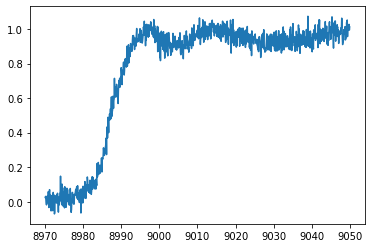

In [335]:
noised_Y = add_noise_to_spectrum(XX, YY, noise_std_der_percent = 0.1)

In [336]:
from scipy.signal import savgol_filter

In [337]:
from scipy.signal import savgol_filter
def smooth_data(Y, window_length = 101, polyoreder = 0):
    new_Y = savgol_filter(Y, window_length = 51, polyorder =1)
    
    return new_Y

In [338]:
smoothed_y = smooth_data(np.array(noised_Y).reshape(-1), window_length = 101, polyoreder = 0)

In [339]:
smoothed_y.shape

(1000,)

In [340]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [341]:
noised_Y_minmax = min_max_scaler.fit_transform(smoothed_y.reshape(-1, 1) )

In [342]:
noised_Y_minmax

array([[0.00000000e+00],
       [2.04907006e-04],
       [4.09814011e-04],
       [6.14721017e-04],
       [8.19628023e-04],
       [1.02453503e-03],
       [1.22944203e-03],
       [1.43434904e-03],
       [1.63925605e-03],
       [1.84416305e-03],
       [2.04907006e-03],
       [2.25397706e-03],
       [2.45888407e-03],
       [2.66379107e-03],
       [2.86869808e-03],
       [3.07360509e-03],
       [3.27851209e-03],
       [3.48341910e-03],
       [3.68832610e-03],
       [3.89323311e-03],
       [4.09814011e-03],
       [4.30304712e-03],
       [4.50795413e-03],
       [4.71286113e-03],
       [4.91776814e-03],
       [5.12267514e-03],
       [5.59137698e-03],
       [5.71666709e-03],
       [5.47535753e-03],
       [5.20975119e-03],
       [7.59371482e-03],
       [7.56333050e-03],
       [8.52783855e-03],
       [8.47439527e-03],
       [7.98120760e-03],
       [8.09274892e-03],
       [8.00675270e-03],
       [8.76617860e-03],
       [8.72956076e-03],
       [9.42631919e-03],


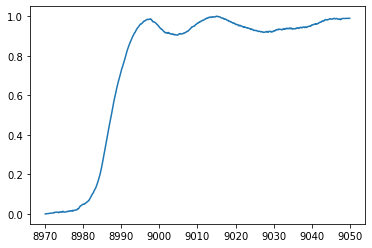

In [343]:
plt.plot(XX, noised_Y_minmax)

Text(0, 0.5, 'absorption')

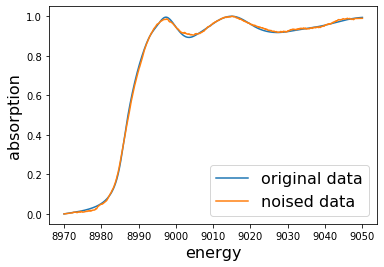

In [344]:
plt.figure(figsize=[20,4])

ax1 = plt.subplot(1,3,1)
ax1.plot(XX, YY, label="original data")
ax1.plot(XX, noised_Y_minmax, label="noised data" )
ax1.legend( fontsize = 16)
plt.xlabel("energy", fontsize= 16)
plt.ylabel("absorption", fontsize= 16)

In [345]:
a = np.linspace(0, 1, 1000)

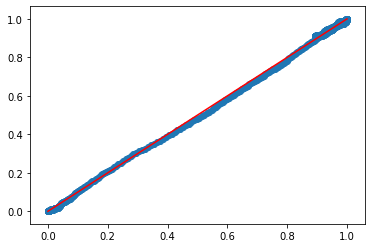

In [346]:
plt.scatter(YY, noised_Y_minmax)
plt.plot(a,a,color = 'red')

In [347]:
from scipy.stats import sem

In [348]:
from sklearn.metrics import r2_score

In [349]:
r2_score(YY, noised_Y_minmax)

0.9996059174759019